<a href="https://colab.research.google.com/github/hyojk2001/Python-Based-Data-Analysis/blob/main/0616_mlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print('image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape)

image Data Shape (1797, 64)
Label Data Shape (1797,)


In [ ]:
# 3.1.4 로지스틱 회귀 및 선형 회귀

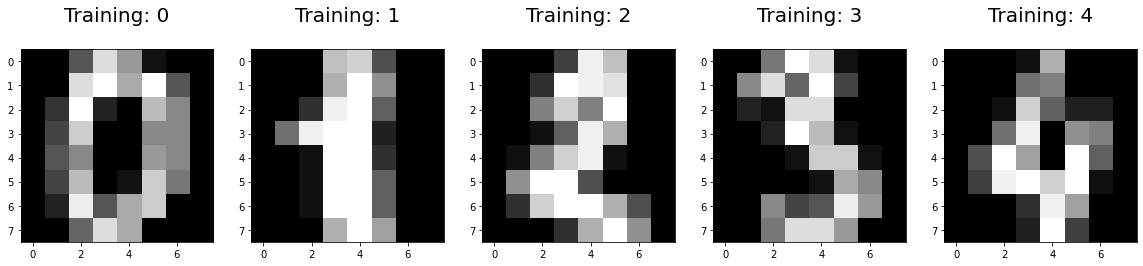

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])): # ------ 예시로 이미지 다섯 개만 확인
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logisticRegr.predict(x_test[0].reshape(1,-1))  # 새로운 이미지(검증데이터)에 대한 예측 결과를 넘파이 배열로 출력
logisticRegr.predict(x_test[0:10])    # 이미지 10개에 대한 예측을 한번에 배열로 출력

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


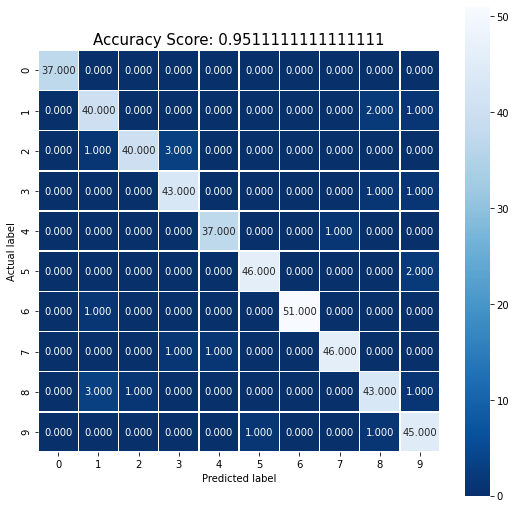

In [ ]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
##################################################

In [ ]:
# 3-22

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
dataset = pd.read_csv('weather.csv')

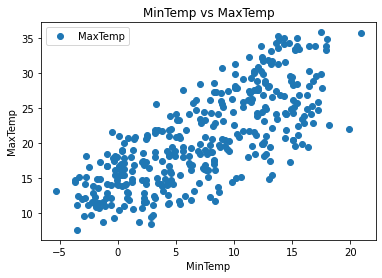

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [ ]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,10.7,13.207158
1,30.9,24.449953
2,29.6,28.553162
3,12.9,15.258763
4,14.4,11.483810
...,...,...
69,22.8,27.650456
70,35.0,26.255365
71,27.3,21.331513
72,11.6,13.453351


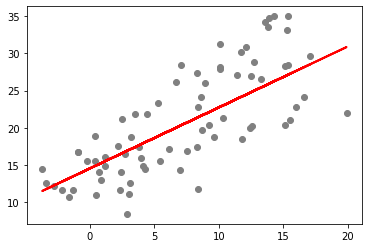

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('평균제곱법 : ', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법 : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

평균제곱법 :  21.61733091503596
루트 평균제곱법 :  4.649444151190114


In [ ]:
#################################################33

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN    #밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

X = pd.read_csv('credit card.csv')
X = X.drop('CUST_ID', axis=1)         # 불러온 데이터에서 ‘CUST_ID’ 열(칼럼)을 삭제
X.fillna(method='ffill', inplace=True) 
print(X.head())                       # 데이터셋 형태 확인

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #평균이 0, 표준편차가 1이 되도록 데이터 크기를 조정

X_normalized = normalize(X_scaled) # 데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) # 넘파일 배열을 데이터프레임(dataframe)으로 변환

pca = PCA(n_components=2) # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268881
3 -0.481656 -0.097611
4 -0.563512 -0.482506


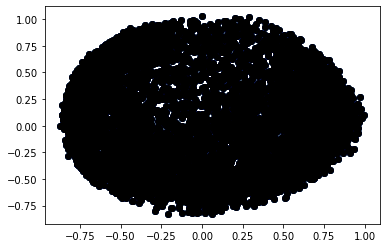

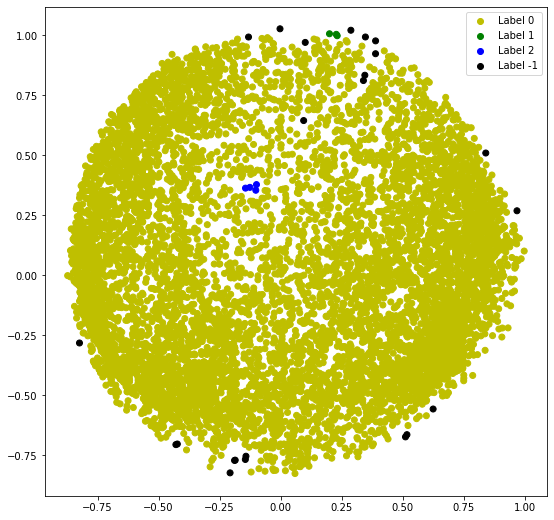

In [ ]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)  #------ 모델 생성 및 훈련
labels = db_default.labels_ #------ 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 labels에 저장

colours = {} #------ 출력 그래프의 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] #------ 각 데이터 포인트에 대한 색상 벡터 생성

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k'); #------ 플롯(plot)의 범례(legend) 구성

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec) #------ 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2 플로팅(plotting)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) #------ 범례 구축
plt.show()

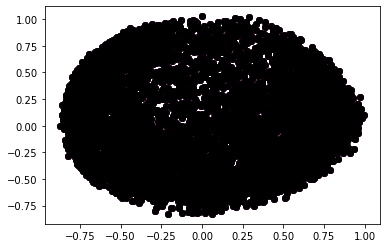

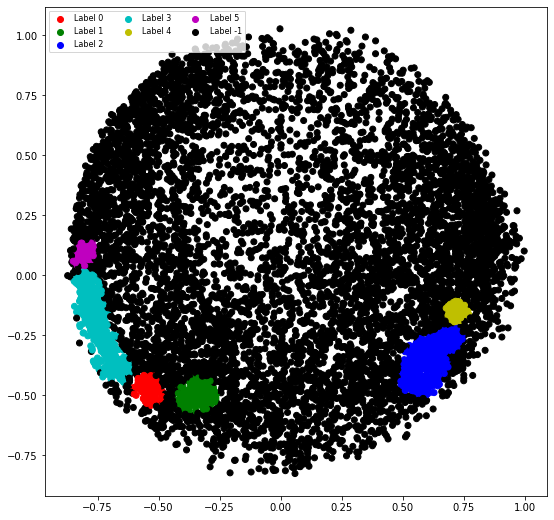

In [ ]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
          ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
          scatterpoints=1,
          loc='upper left',
          ncol=3,
          fontsize=8)
plt.show()

In [ ]:
# 3.2.1 K-means clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
categorical_features = ['Channel', 'Region'] #------ 명목형 데이터
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] #------ 연속형 데이터

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) #------ 명목형 데이터는 판다스의 get_ dummies() 메서드를 사용하여 바이너리로 변환
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [ ]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
data_transformed

array([[0.11294004, 0.13072723, 0.08146416, ..., 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, ..., 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, ..., 0.        , 0.        ,
        1.        ],
       [0.091727  , 0.02622442, 0.02402535, ..., 0.        , 0.        ,
        1.        ],
       [0.02482434, 0.02237109, 0.02702178, ..., 0.        , 0.        ,
        1.        ]])

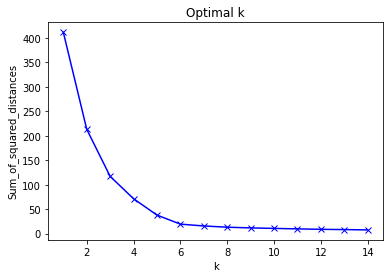

In [ ]:
Sum_of_squared_distances = []
K = range(1, 15) #------ K에 1부터 15까지 적용해 봅니다.
for k in K:
    km = KMeans(n_clusters=k) #------ 1~15의 K 값 적용
    km = km.fit(data_transformed) #------ KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()